In [40]:
import pandas as pd


df = pd.read_csv('../data/jetbluenew_df.csv')

df['flightDate'] = pd.to_datetime(df['flightDate'])

fixed_holidays = [
    '2022-04-15',  # Good Friday
    '2022-04-17',  # Easter Sunday
    '2022-04-23',  # NYC Spring Break 
    '2022-04-30',  # NYC Cherry Blossom Festival
    '2022-05-02',  # Eid al-Fitr
    '2022-05-08',  # Mother's Day
    '2022-05-25',  # Fleet Week NYC start
    '2022-05-30',  # Memorial Day
    '2022-06-12',  # Puerto Rican Day Parade in NYC
    '2022-06-19',  # Juneteenth
    '2022-06-20',  # Observed Juneteenth
    '2022-06-19',  # Father's Day
    '2022-06-26',  # NYC Pride March
    '2022-07-04',  # Independence Day
    '2022-07-14',  # Bastille Day celebrations
    '2022-07-16',  # Harlem Week Opening Events
    '2022-07-22',  # Comic-Con NYC start
    '2022-07-31',  # Harlem Week Closing Events
]
fixed_holidays = pd.to_datetime(fixed_holidays)


def calculate_dynamic_holidays(year):
    
    holidays = []
    
    # Mother's Day: Second Sunday in May
    may = pd.date_range(start=f'{year}-05-01', end=f'{year}-05-31', freq='D')
    mothers_day = may[may.dayofweek == 6][1]  # Second Sunday
    holidays.append(mothers_day)
    
    # Father's Day: Third Sunday in June
    june = pd.date_range(start=f'{year}-06-01', end=f'{year}-06-30', freq='D')
    fathers_day = june[june.dayofweek == 6][2]  # Third Sunday
    holidays.append(fathers_day)
    
    return holidays


dynamic_holidays = calculate_dynamic_holidays(2022)


all_holidays = list(fixed_holidays) + dynamic_holidays


df['isHoliday'] = df['flightDate'].isin(all_holidays).astype(int)

def is_near_holiday(date, holidays, window=3):
    """
    Check if the date is within the window (before/after) of any holiday.
    """
    return any((date >= holiday - pd.Timedelta(days=window)) & (date <= holiday + pd.Timedelta(days=window)) for holiday in holidays)


df['isNearHoliday'] = df['flightDate'].apply(lambda x: 1 if is_near_holiday(x, all_holidays, window=3) else 0)

realjetbluedf = df.copy()  
realjetbluedf.to_csv('../data/realjetbluedf.csv', index=False)

print("Columns in the new DataFrame:")
print(realjetbluedf.columns)

print("\nFirst 15 rows of the updated DataFrame:")
print(realjetbluedf.head(15))


Columns in the new DataFrame:
Index(['searchDate', 'route', 'flightDate', 'startingAirport',
       'destinationAirport', 'travelDuration', 'elapsedDays', 'isBasicEconomy',
       'isRefundable', 'isNonStop', 'baseFare', 'totalFare', 'seatsRemaining',
       'totalTravelDistance', 'segmentsDepartureTimeRaw',
       'segmentsArrivalTimeRaw', 'segmentsArrivalAirportCode',
       'segmentsDepartureAirportCode', 'segmentsAirlineName',
       'segmentsDurationInSeconds', 'segmentsCabinCode', 'departureTime',
       'arrivalTime', 'departureCategory', 'arrivalCategory', 'daysLeft',
       'numStops', 'isHoliday', 'isNearHoliday'],
      dtype='object')

First 15 rows of the updated DataFrame:
    searchDate    route flightDate startingAirport destinationAirport  \
0   2022-04-16  ATL|EWR 2022-04-17             ATL                EWR   
1   2022-04-16  ATL|JFK 2022-04-17             ATL                JFK   
2   2022-04-16  ATL|JFK 2022-04-17             ATL                JFK   
3   2022-04-

In [ ]:
Plot Inquiries regarding holiday section:
Had to reconfirm and make such columns exist for plots

Plot Insights:


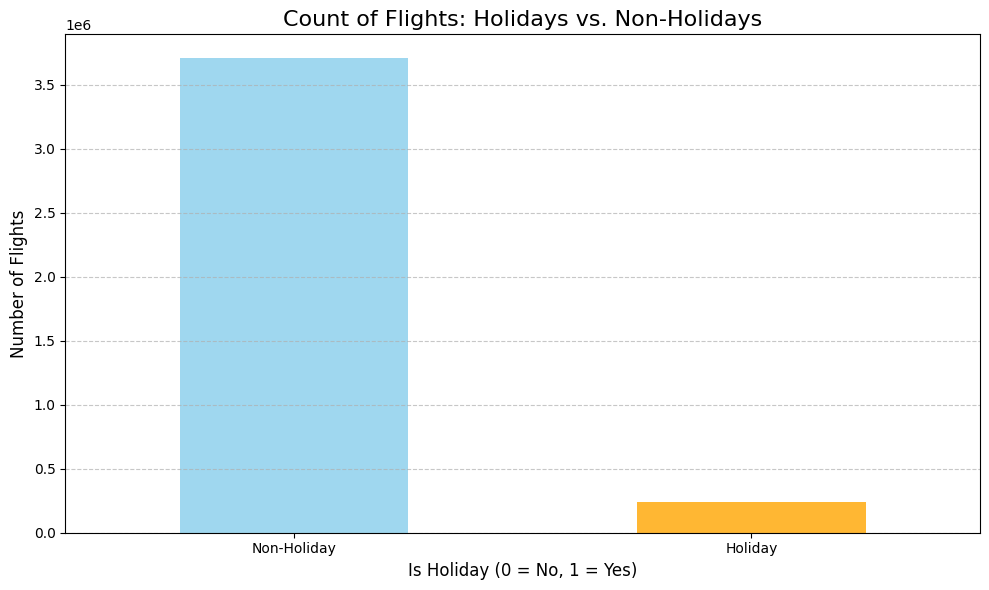

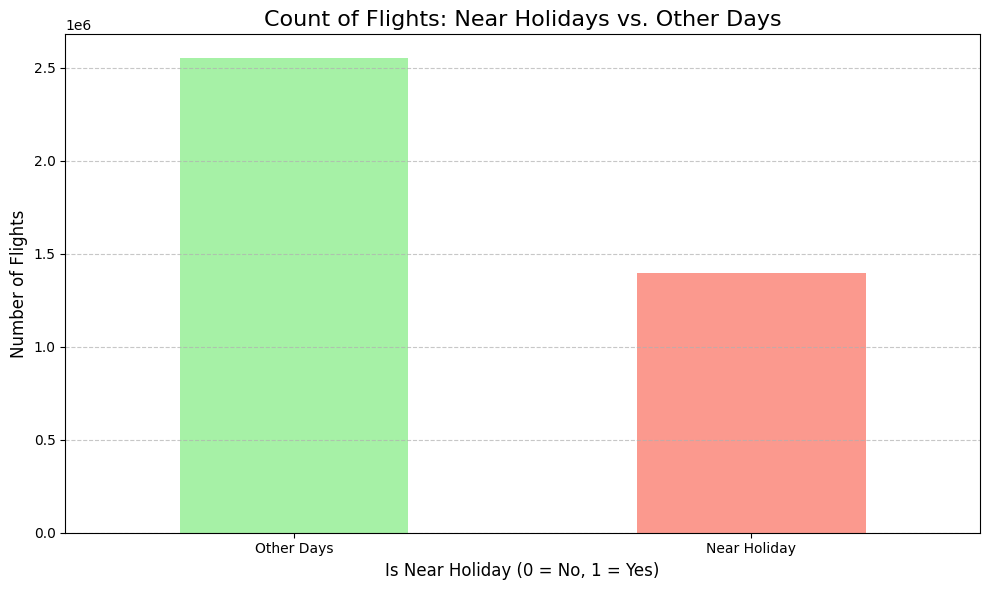

<Figure size 1000x600 with 0 Axes>

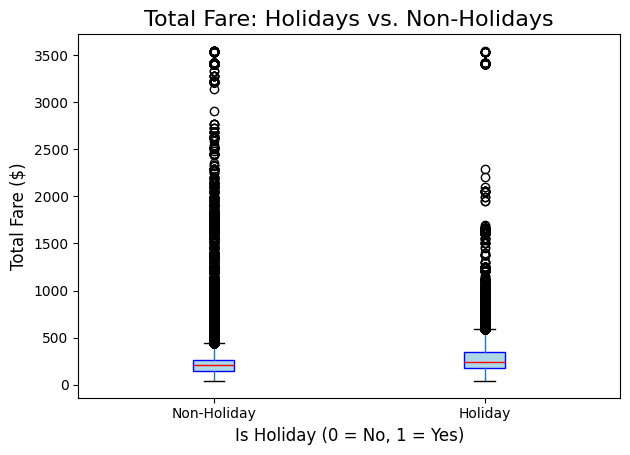

<Figure size 1000x600 with 0 Axes>

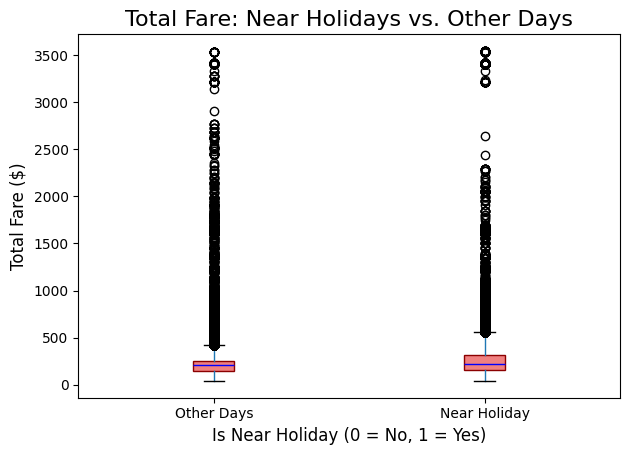

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('../data/realjetbluedf.csv')  #


df['flightDate'] = pd.to_datetime(df['flightDate'])

# Plot 1: Count of Flights on Holidays vs. Non-Holidays
plt.figure(figsize=(10, 6))
df['isHoliday'].value_counts().plot(kind='bar', color=['skyblue', 'orange'], alpha=0.8)
plt.title('Count of Flights: Holidays vs. Non-Holidays', fontsize=16)
plt.xlabel('Is Holiday (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot 2: Count of Flights Near Holidays vs. Other Days
plt.figure(figsize=(10, 6))
df['isNearHoliday'].value_counts().plot(kind='bar', color=['lightgreen', 'salmon'], alpha=0.8)
plt.title('Count of Flights: Near Holidays vs. Other Days', fontsize=16)
plt.xlabel('Is Near Holiday (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.xticks([0, 1], ['Other Days', 'Near Holiday'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot 3: Boxplot of Total Fare on Holidays vs. Non-Holidays
plt.figure(figsize=(10, 6))
df.boxplot(column='totalFare', by='isHoliday', grid=False, patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='blue'), medianprops=dict(color='red'))
plt.title('Total Fare: Holidays vs. Non-Holidays', fontsize=16)
plt.suptitle('')  
plt.xlabel('Is Holiday (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Total Fare ($)', fontsize=12)
plt.xticks([1, 2], ['Non-Holiday', 'Holiday'], rotation=0)
plt.tight_layout()
plt.show()

# Plot 4: Boxplot of Total Fare Near Holidays vs. Other Days
plt.figure(figsize=(10, 6))
df.boxplot(column='totalFare', by='isNearHoliday', grid=False, patch_artist=True,
           boxprops=dict(facecolor='lightcoral', color='darkred'), medianprops=dict(color='blue'))
plt.title('Total Fare: Near Holidays vs. Other Days', fontsize=16)
plt.suptitle('')  
plt.xlabel('Is Near Holiday (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Total Fare ($)', fontsize=12)
plt.xticks([1, 2], ['Other Days', 'Near Holiday'], rotation=0)
plt.tight_layout()
plt.show()



Heatmap correlation between total fare and holidays

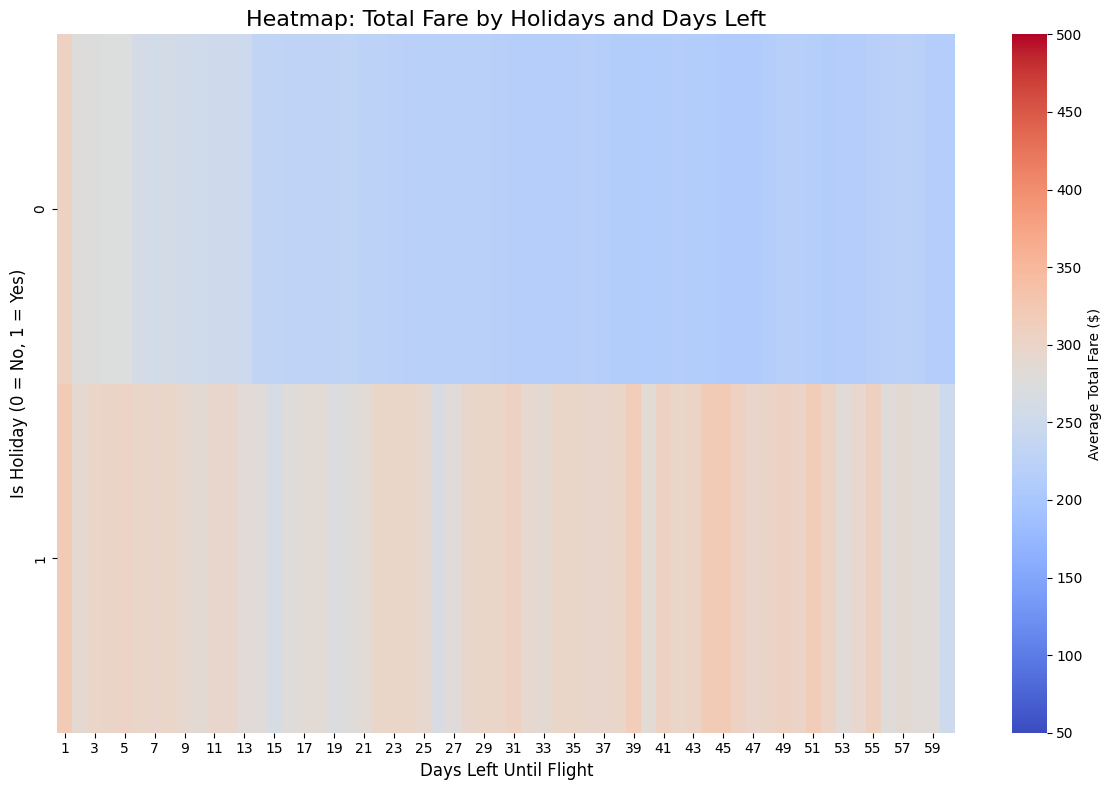

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('../data/realjetbluedf.csv')


pivot = df.pivot_table(index='isHoliday', columns='daysLeft', values='totalFare', aggfunc='mean')


plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='coolwarm', vmin=50, vmax=500, cbar_kws={'label': 'Average Total Fare ($)'})
plt.title('Heatmap: Total Fare by Holidays and Days Left', fontsize=16)
plt.xlabel('Days Left Until Flight', fontsize=12)
plt.ylabel('Is Holiday (0 = No, 1 = Yes)', fontsize=12)
plt.tight_layout()
plt.show()
